In [56]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('all_data.csv')

In [66]:
df.head(25)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [76]:
df = df.rename({'Life expectancy at birth (years)':'LEABY'}, axis='columns')

In [77]:
df['GDP-LEABY Ratio'] = df.GDP/df.LEABY

In [78]:
df.head()

,Country,Year,LEABY,GDP,GDP-LEABY Ratio
0,Chile,2000,77.3,7.786093e+10,1.007257e+09
1,Chile,2001,77.3,7.097992e+10,9.182396e+08
2,Chile,2002,77.8,6.973681e+10,8.963600e+08
3,Chile,2003,77.9,7.564346e+10,9.710329e+08
4,Chile,2004,78.0,9.921039e+10,1.271928e+09


In [71]:
dfMeans= df.drop("Year", axis=1).groupby("Country").mean().reset_index()
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Text(0.5, 0, 'GDP (USD, Trillions)')

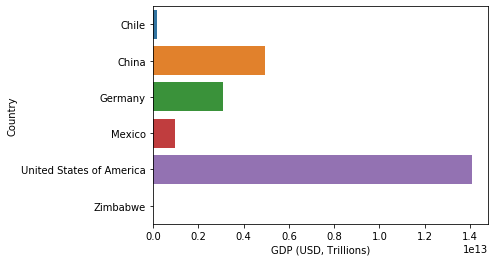

In [72]:
sns.barplot(x="GDP", y="Country", data = dfMeans)
plt.xlabel("GDP (USD, Trillions)")

Text(0.5, 0, 'Life Expectancy at Birth (Years)')

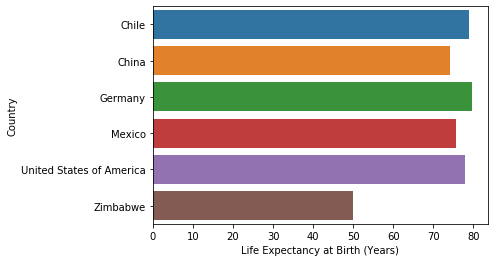

In [73]:
sns.barplot(x="LEABY", y="Country", data = dfMeans)
plt.xlabel("Life Expectancy at Birth (Years)")

Text(0, 0.5, 'Life Expectancy at Birth (Years)')

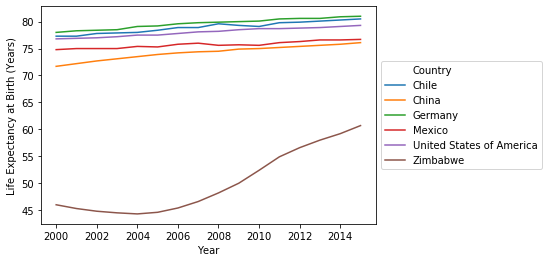

In [74]:
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=1)
plt.ylabel("Life Expectancy at Birth (Years)")

Text(0, 0.5, 'GDP (USD, Trillions)')

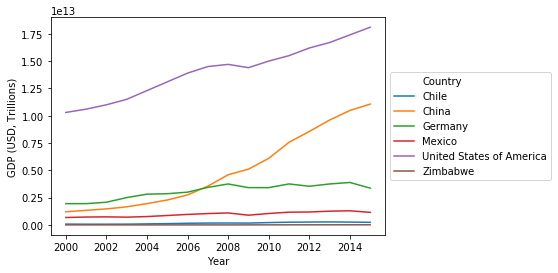

In [75]:
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=1)
plt.ylabel("GDP (USD, Trillions)")

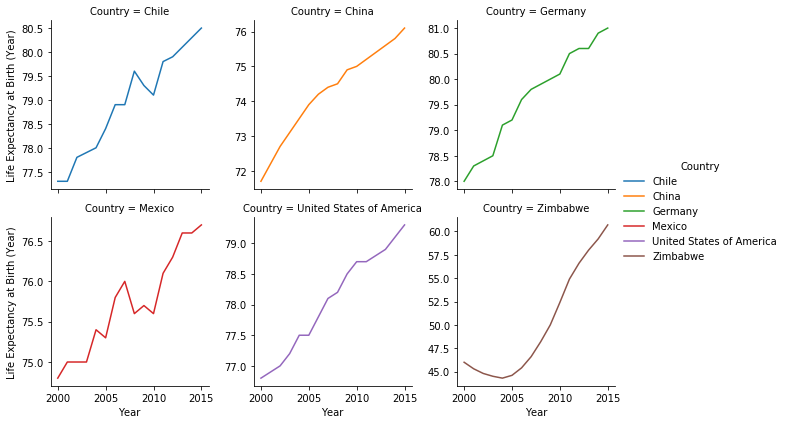

In [81]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,hue="Country", sharey=False)
graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY").add_legend()
             .set_axis_labels("Year","Life Expectancy at Birth (Year)"))
graphLEABY

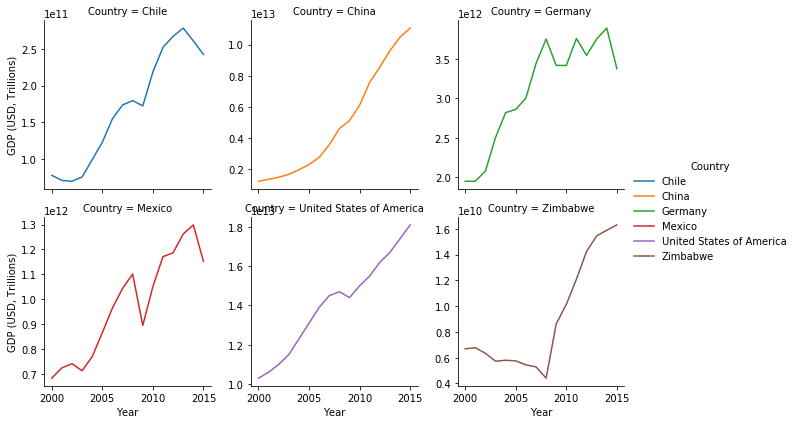

In [82]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,hue="Country", sharey=False)
graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend()
             .set_axis_labels("Year","GDP (USD, Trillions)"))
graphGDP

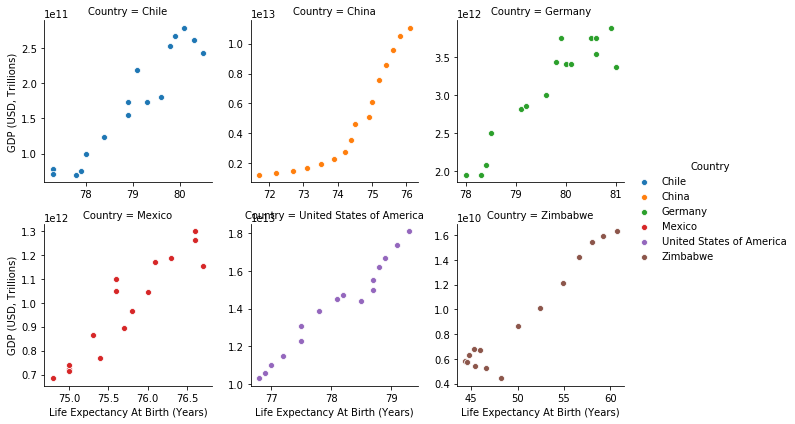

In [84]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country",
                     sharey=False,sharex=False)
graph = (graph.map(sns.scatterplot,"LEABY","GDP")
        .add_legend()
        .set_axis_labels("Life Expectancy At Birth (Years)","GDP (USD, Trillions)"))

Text(0.5, 0, 'Life Expectancy at Birth (Years)')

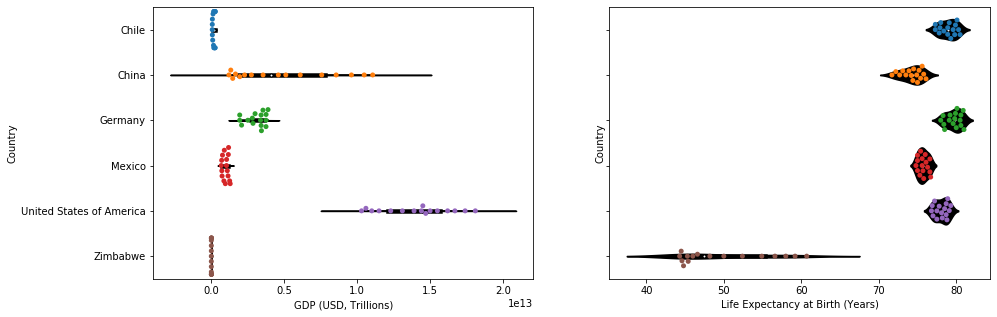

In [93]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color="black")
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP (USD, Trillions)")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color="black")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life Expectancy at Birth (Years)")